# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#just a note for the future, for whatever reason citipy did not work on my machine, I had to 
#get on the ole google and find out that I had to pip install in for citipy to work correctly, 
#in case you hear about this issue from more students, but it could have just been me.

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#getting this box to appropriately cycle through the generated cities was probably my biggest stumbling block
#with this exercise. I started with the starter code provided but for reasons I was unable to parse in the time I had
#my api calls all returned 'city not found, skipping', so went back to the drawing board with making empty lists and 
#appending them and at least in this configuration I can pull the data from the website to then make it a dataframe. 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# empty lists to add to
lon = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lat = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("-------------------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
    
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(1)
    print(f"Processing Record {count} of Set {set} | {city}")
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)


print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | reggane
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | quebo
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | puerto asis
Processing Record 13 of Set 1 | howrah
Processing Record 14 of Set 1 | khandyga
Processing Record 15 of Set 1 | igarape miri
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | kapoeta
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | pemalang
Processing Record 22 of Set 1 | fisterra
Processing Record 23 of Set 1 

Processing Record 43 of Set 4 | rimouski
Processing Record 44 of Set 4 | jalqani
Processing Record 45 of Set 4 | dakhla
Processing Record 46 of Set 4 | ola
Processing Record 47 of Set 4 | jutai
Processing Record 48 of Set 4 | nizhneudinsk
Processing Record 49 of Set 4 | gombong
Processing Record 50 of Set 4 | cajati
Processing Record 1 of Set 5 | swan hill
Processing Record 2 of Set 5 | kavaratti
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | rio preto da eva
Processing Record 5 of Set 5 | nikolayevsk-on-amure
Processing Record 6 of Set 5 | tazovsky
Processing Record 7 of Set 5 | trairi
Processing Record 8 of Set 5 | ngama
Processing Record 9 of Set 5 | ta`u
Processing Record 10 of Set 5 | ain smara
Processing Record 11 of Set 5 | la'ie
Processing Record 12 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 13 of Set 5 | la ronge
Processing Record 14 of Set 5 | kodinsk
Processing Record 15 of Set 5 | vadso
Processing Record 16 of Set 5 | menomin

Processing Record 34 of Set 8 | revda
Processing Record 35 of Set 8 | bratsk
Processing Record 36 of Set 8 | grande prairie
Processing Record 37 of Set 8 | newman
Processing Record 38 of Set 8 | argostolion
Processing Record 39 of Set 8 | colonia
Processing Record 40 of Set 8 | nyurba
Processing Record 41 of Set 8 | slobodskoy
Processing Record 42 of Set 8 | ouargla
Processing Record 43 of Set 8 | salmon arm
Processing Record 44 of Set 8 | happy valley-goose bay
Processing Record 45 of Set 8 | mitu
Processing Record 46 of Set 8 | huntsville
Processing Record 47 of Set 8 | ciudad bolivar
Processing Record 48 of Set 8 | sao pedro do sul
Processing Record 49 of Set 8 | rabo de peixe
Processing Record 50 of Set 8 | broome
Processing Record 1 of Set 9 | toamasina
Processing Record 2 of Set 9 | mount gambier
Processing Record 3 of Set 9 | zaragoza
Processing Record 4 of Set 9 | jijiga
Processing Record 5 of Set 9 | livingstone
Processing Record 6 of Set 9 | thinadhoo
Processing Record 7 of S

Processing Record 21 of Set 12 | roswell
Processing Record 22 of Set 12 | castillos
Processing Record 23 of Set 12 | ludington
Processing Record 24 of Set 12 | hancheng
Processing Record 25 of Set 12 | saida
Processing Record 26 of Set 12 | bougouni
Processing Record 27 of Set 12 | caririacu
Processing Record 28 of Set 12 | mil'kovo
Processing Record 29 of Set 12 | strathalbyn
Processing Record 30 of Set 12 | shvartsevskiy
Processing Record 31 of Set 12 | bail-hongal
Processing Record 32 of Set 12 | moldova noua
Processing Record 33 of Set 12 | amealco
Processing Record 34 of Set 12 | pasni
Processing Record 35 of Set 12 | lompoc
Processing Record 36 of Set 12 | orange
Processing Record 37 of Set 12 | flying fish cove
Processing Record 38 of Set 12 | beidaihehaibin
Processing Record 39 of Set 12 | aksehir
Processing Record 40 of Set 12 | san jose village
City not found. Skipping...
Processing Record 41 of Set 12 | melfort
Processing Record 42 of Set 12 | diyadin
Processing Record 43 of

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})


city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,reggane,26.7158,0.1714,92.48,11.0,13.0,8.79,DZ,1.683839e+09
1,waitangi,-43.9535,-176.5597,48.81,85.0,35.0,3.00,NZ,1.683840e+09
2,yellowknife,62.4560,-114.3525,66.56,34.0,1.0,17.00,CA,1.683840e+09
3,geraldton,-28.7667,114.6000,55.81,54.0,21.0,12.66,AU,1.683840e+09
4,adamstown,-25.0660,-130.1015,70.45,58.0,92.0,17.45,PN,1.683839e+09
...,...,...,...,...,...,...,...,...,...
589,san jose village,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,melfort,52.8667,-104.6177,73.53,21.0,100.0,4.61,CA,1.683840e+09
591,diyadin,39.5406,43.6713,48.97,64.0,23.0,5.86,TR,1.683840e+09
592,arkhangel'sk,64.5401,40.5433,38.70,96.0,46.0,5.10,RU,1.683840e+09


In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,reggane,26.7158,0.1714,92.48,11.0,13.0,8.79,DZ,1.683839e+09
1,waitangi,-43.9535,-176.5597,48.81,85.0,35.0,3.00,NZ,1.683840e+09
2,yellowknife,62.4560,-114.3525,66.56,34.0,1.0,17.00,CA,1.683840e+09
3,geraldton,-28.7667,114.6000,55.81,54.0,21.0,12.66,AU,1.683840e+09
4,adamstown,-25.0660,-130.1015,70.45,58.0,92.0,17.45,PN,1.683839e+09


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,reggane,26.7158,0.1714,92.48,11.0,13.0,8.79,DZ,1.683839e+09
1,waitangi,-43.9535,-176.5597,48.81,85.0,35.0,3.00,NZ,1.683840e+09
2,yellowknife,62.4560,-114.3525,66.56,34.0,1.0,17.00,CA,1.683840e+09
3,geraldton,-28.7667,114.6000,55.81,54.0,21.0,12.66,AU,1.683840e+09
4,adamstown,-25.0660,-130.1015,70.45,58.0,92.0,17.45,PN,1.683839e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

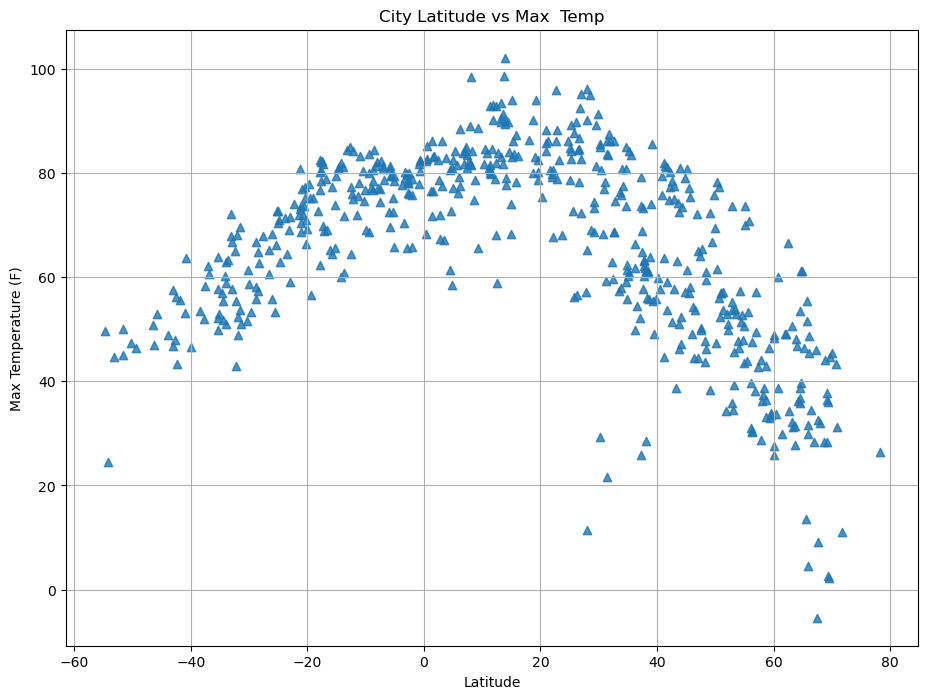

In [44]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties

fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, linewidth=1, marker="^", alpha=0.8)
plt.title(f"City Latitude vs Max  Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

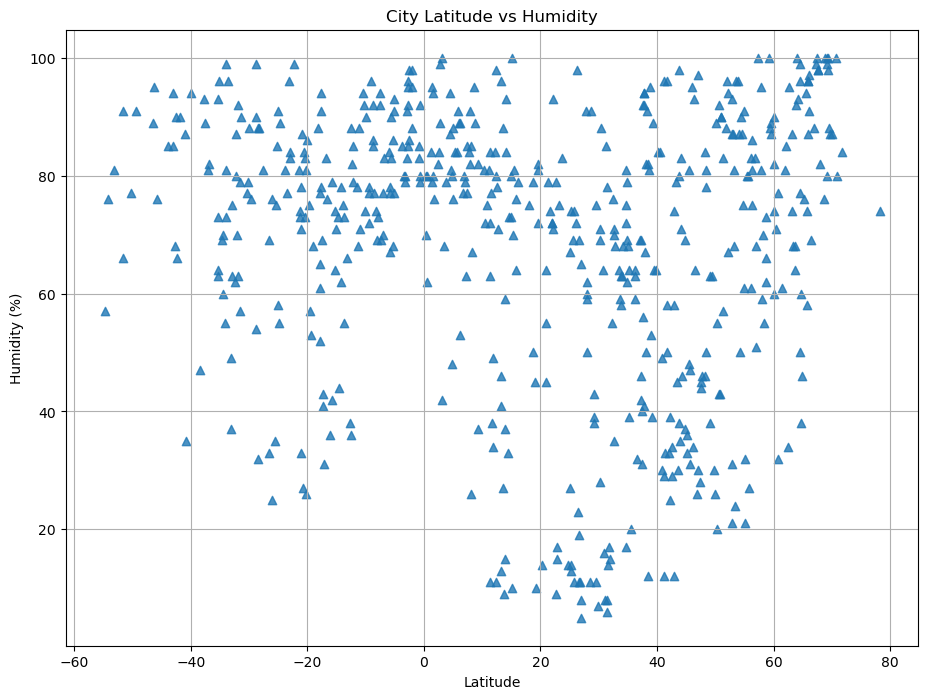

In [43]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, linewidth=1, marker="^", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()


# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

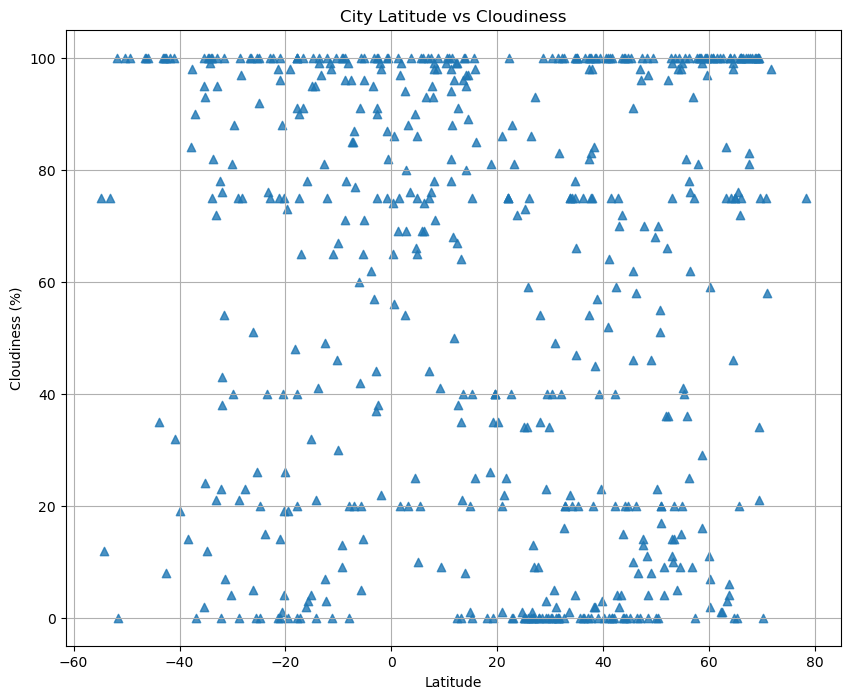

In [45]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

fig1, ax1 = plt.subplots(figsize=(10,8))


plt.scatter(x_values, y_values, linewidth=1, marker="^", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness")
plt.grid()


# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

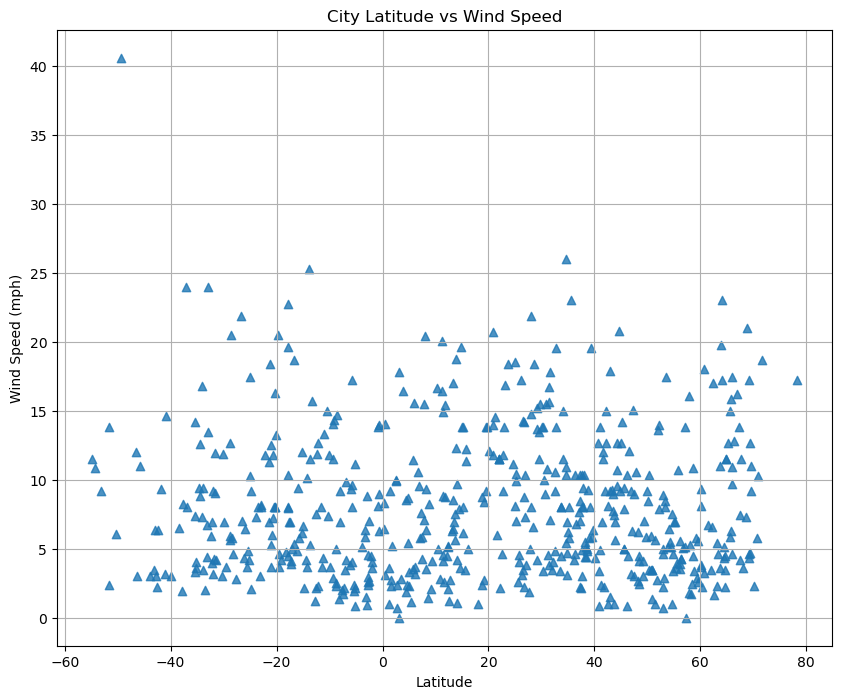

In [46]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

fig1, ax1 = plt.subplots(figsize=(10,8))

plt.scatter(x_values, y_values, linewidth=1, marker="^", alpha=0.8)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, linewidth=1, marker="^", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    #tracing my error call backward I'm finding something about this code below is not right, 
    #it is reading the st. from st.pearsonr as if it was a name if I understand the error right,
    #tho not sure at this juncture how to fix it.
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,reggane,26.7158,0.1714,92.48,11.0,13.0,8.79,DZ,1.683839e+09
2,yellowknife,62.4560,-114.3525,66.56,34.0,1.0,17.00,CA,1.683840e+09
5,jamestown,42.0970,-79.2353,74.84,33.0,0.0,9.22,US,1.683839e+09
6,quebo,11.3333,-14.9333,80.51,63.0,98.0,8.86,GW,1.683840e+09
7,keflavik,64.0049,-22.5624,46.83,100.0,100.0,23.02,IS,1.683839e+09


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,48.81,85.0,35.0,3.00,NZ,1.683840e+09
3,geraldton,-28.7667,114.6000,55.81,54.0,21.0,12.66,AU,1.683840e+09
4,adamstown,-25.0660,-130.1015,70.45,58.0,92.0,17.45,PN,1.683839e+09
8,grytviken,-54.2811,-36.5092,24.51,76.0,12.0,10.83,GS,1.683840e+09
9,ushuaia,-54.8000,-68.3000,49.66,57.0,75.0,11.50,AR,1.683840e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5868215977781919


NameError: name 'st' is not defined

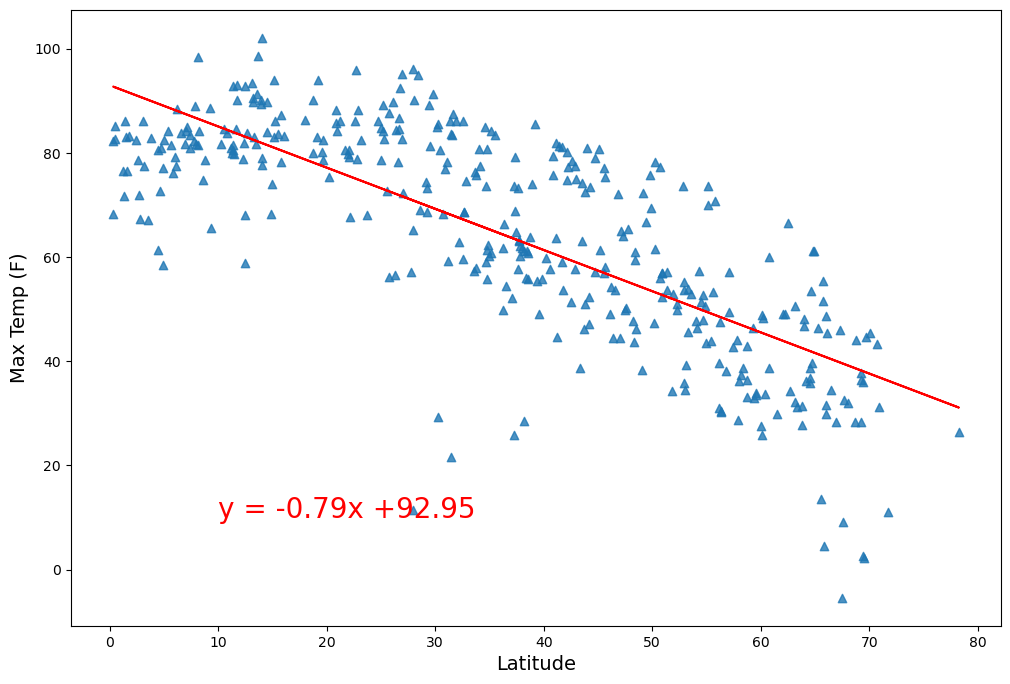

In [50]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

plt.show()

#though I get the line looking like it does in the provided sample code, I still get an error message
#with every single one of these lin regs I plot. My culprit is somewhere in the code I tried to make to 
#calculate and display the lin reg above tho I'll have to come back to this later.

The r-squared is: 0.6896563290067045


NameError: name 'st' is not defined

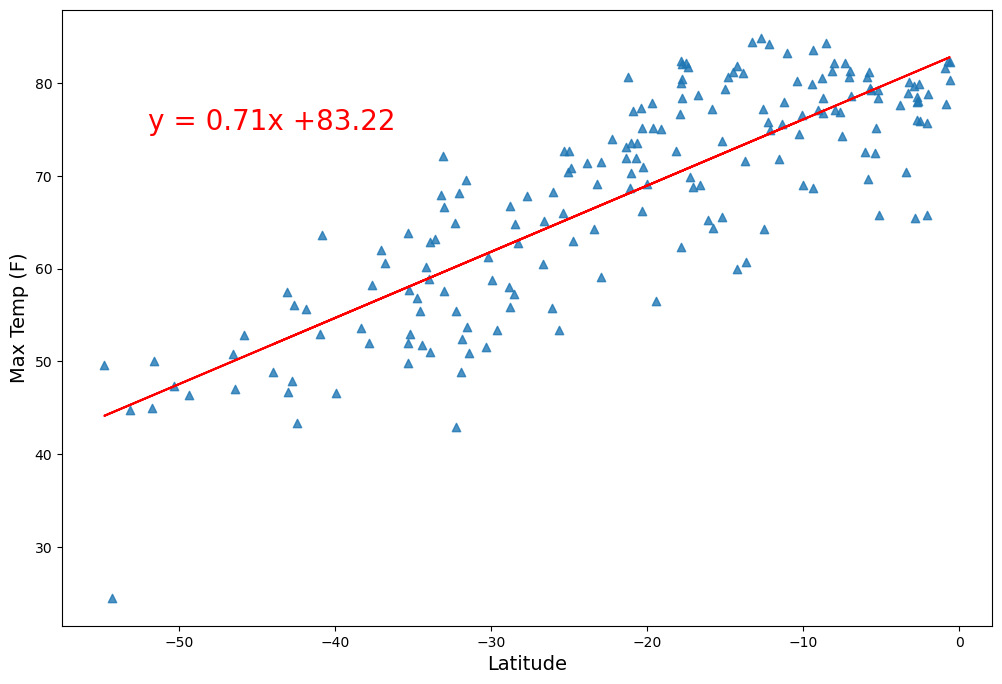

In [51]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))



**Discussion about the linear relationship:** There is a strong correlation between the max temp and the latitude in both hemispheres. The closer you are to the equator, the warmer it strongly tends to be.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.014186313499614881


NameError: name 'st' is not defined

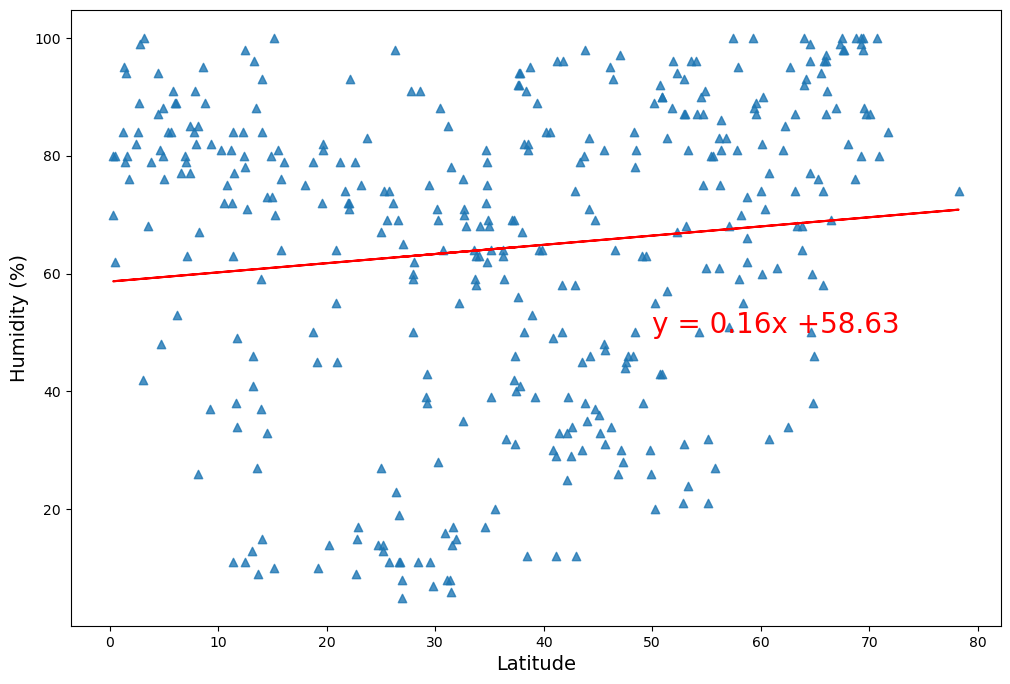

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))

plt.show()

The r-squared is: 0.009630111639408792


NameError: name 'st' is not defined

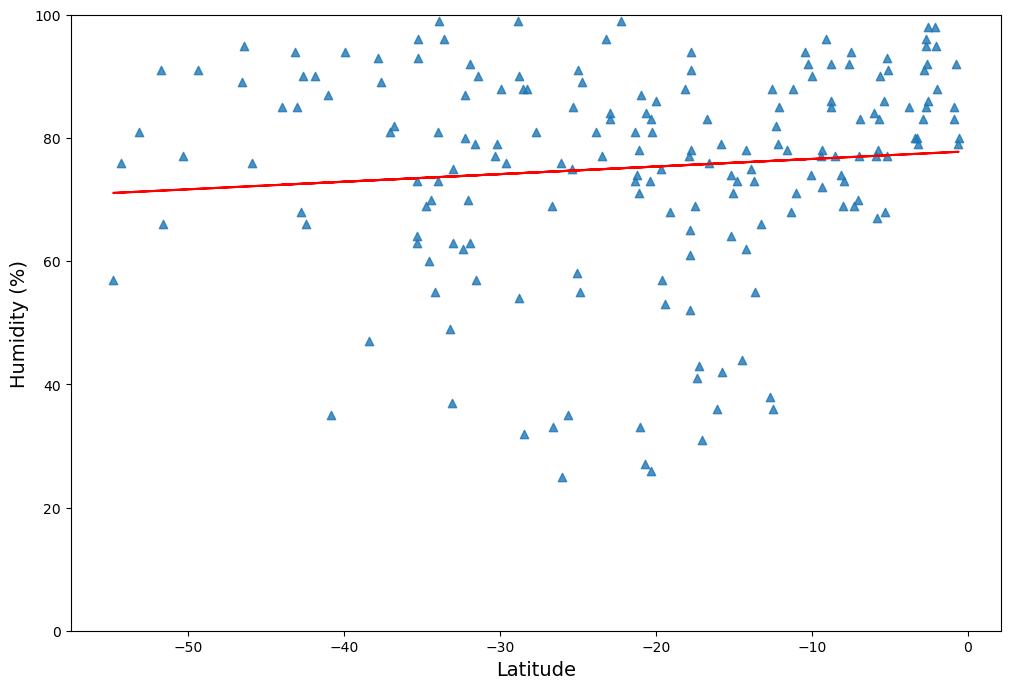

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)

plt.show()

**Discussion about the linear relationship:** There does not appear to be a strong correlation between latitude and humidity, very very weak correlation in both hemispheres, particularly the southern.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 2.6613329494471616e-06


NameError: name 'st' is not defined

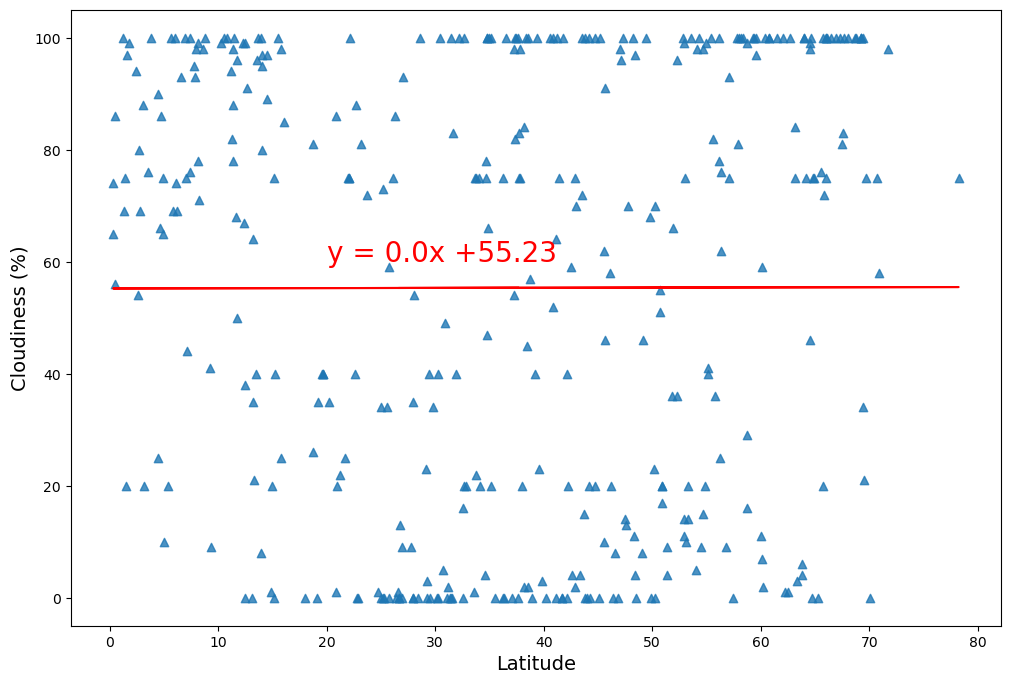

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.show()
#I've been getting error messages for each of these lin regress lines, but this is the first one I've run into with 
#am r-squared >1 which iirc shouldn't be possible therefore I must be making a for real error somewhere...

The r-squared is: 0.00010117871283413314


NameError: name 'st' is not defined

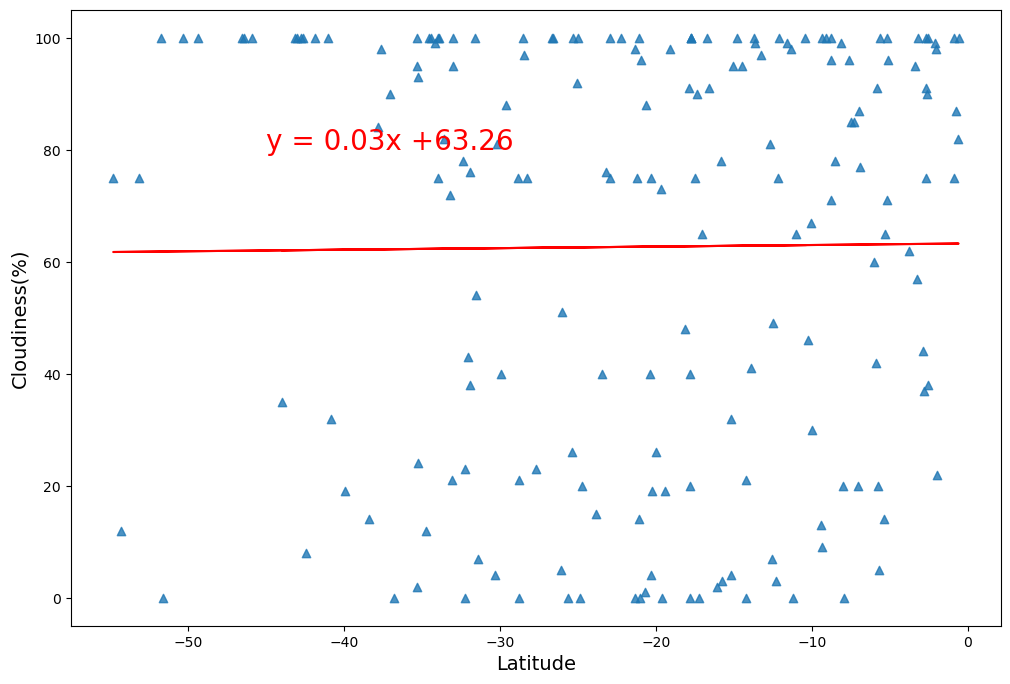

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 80))

plt.show()

**Discussion about the linear relationship:** Once again, there does not appear to be much of a correlation at all between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 4.247874926655139e-05


NameError: name 'st' is not defined

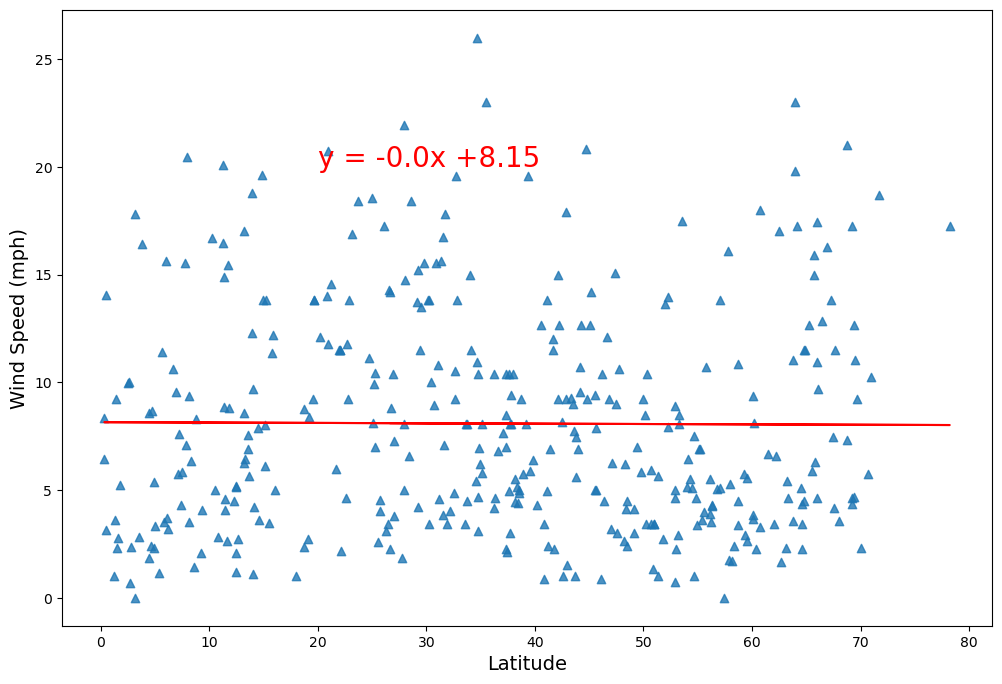

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 20))

plt.show()

#another impossible r-squared has appeared

The r-squared is: 0.022418905587038095


NameError: name 'st' is not defined

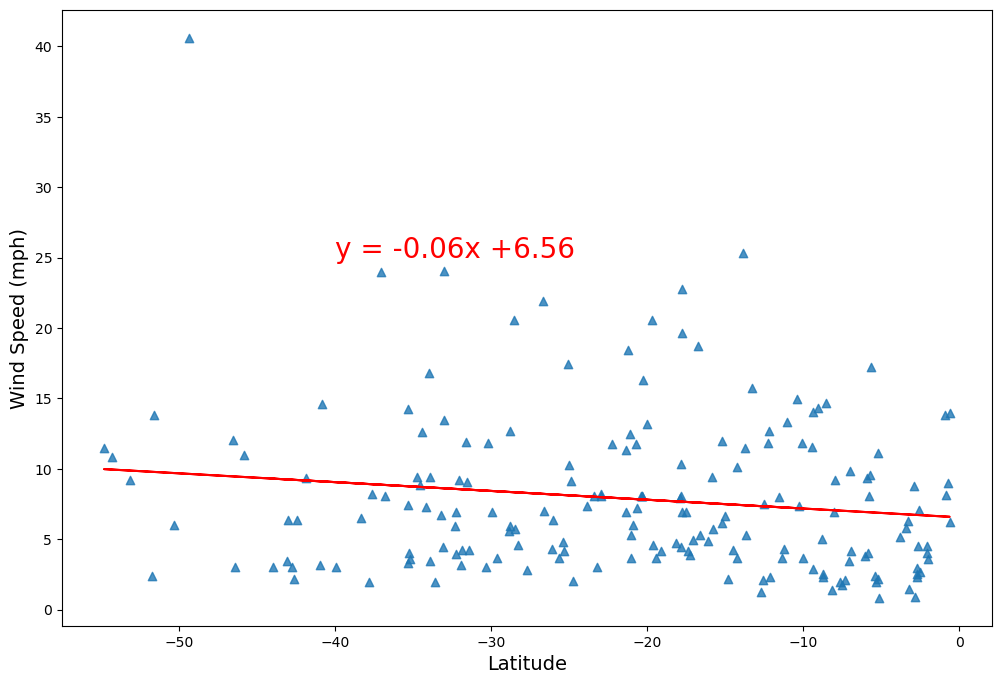

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25))

plt.show()

**Discussion about the linear relationship:** Not much correlation in the northern hemisphere, but there does seem to be a slight negative correlation in the southern hemisphere, the further away you move from the equator south it gets more windy. I wonder if the southern oceanic winds account for any of that.